In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# 1.Import the dataset:

In [89]:
df=pd.read_csv("data/stud.csv")

# 2.print 7 top rows

In [90]:

df.head(7)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


# 3.data checks to perform
- check missing value
- check duplicate
- check data type
- check the number of unique value of each column
- check statistics of data set
- check various categories present in the different categrorical column

In [91]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

- there is no duplicate value in dataset

In [92]:
cols=df.select_dtypes(include="object").columns
for col in cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: gender
gender
female    518
male      482
Name: count, dtype: int64

Column: race_ethnicity
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Column: parental_level_of_education
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Column: lunch
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Column: test_preparation_course
test_preparation_course
none         642
completed    358
Name: count, dtype: int64


In [93]:
# checking the number of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [94]:
#check statistics of data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# insight 
- Students score better in reading & writing than math → math is hardest subject 

- Same standard deviation (~15) → good & weak students stay consistent across subjects

- Math has 0 minimum score → some students completely fail only in math

- Dataset is gender balanced → low bias risk ⚖️

- Most students belong to mid-education families → not highly educated background

- Majority students did NOT complete test preparation → strong impact feature 🎯

- Reading/Writing always get some marks → conceptual failure mainly happens in math

In [95]:
#adding columns  for "total score" and "average"
df["total_score"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["average"]=(df["total_score"]/3).round(2)

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [96]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()

print(f"Number of students with full marks in math: {math_full}")
print(f"Number of students with full marks in writing: {writing_full}")
print(f"Number of students with full marks in reading: {reading_full}")

subjects = ["math_score", "reading_score", "writing_score"]

for sub in subjects:
    full = (df[sub] == 100).sum()
    print(f"Number of students with full marks in {sub.split('_')[0]}: {full}")

Number of students with full marks in math: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17
Number of students with full marks in math: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [97]:
(df[["math_score","reading_score","writing_score"]] >= 35).sum()

math_score       978
reading_score    985
writing_score    983
dtype: int64

# Visualazation:

- 4.1 Histogram 

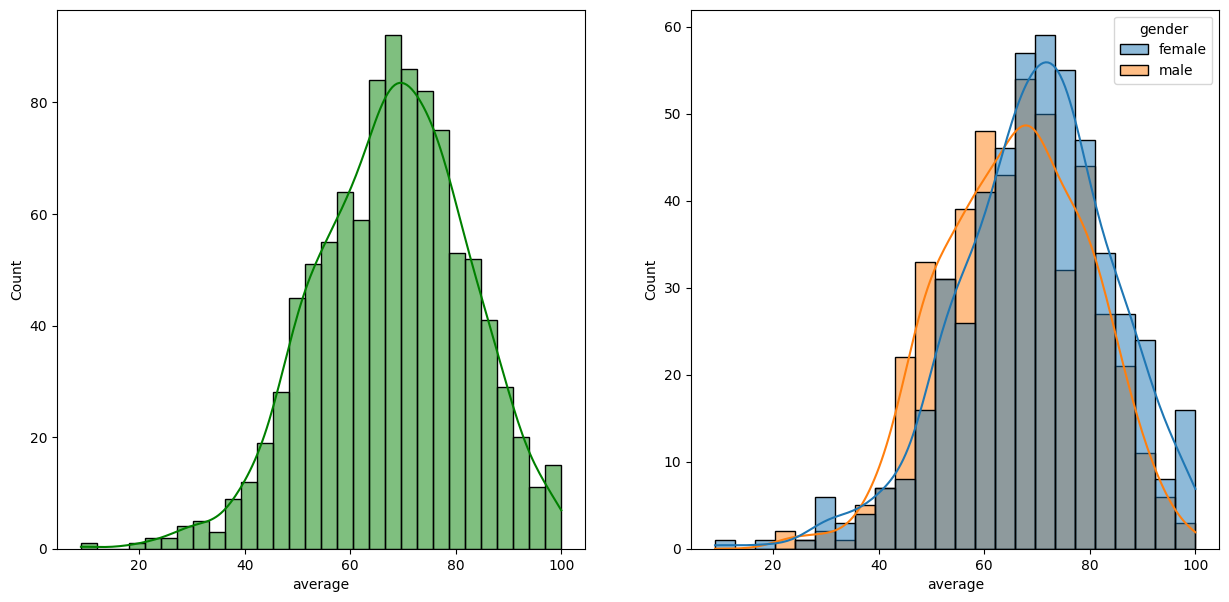

In [98]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))

sns.histplot(data=df, x="average", bins=30, kde=True, color='g', ax=axs[0])

sns.histplot(data=df, x="average", kde=True, hue='gender', ax=axs[1])

plt.show()

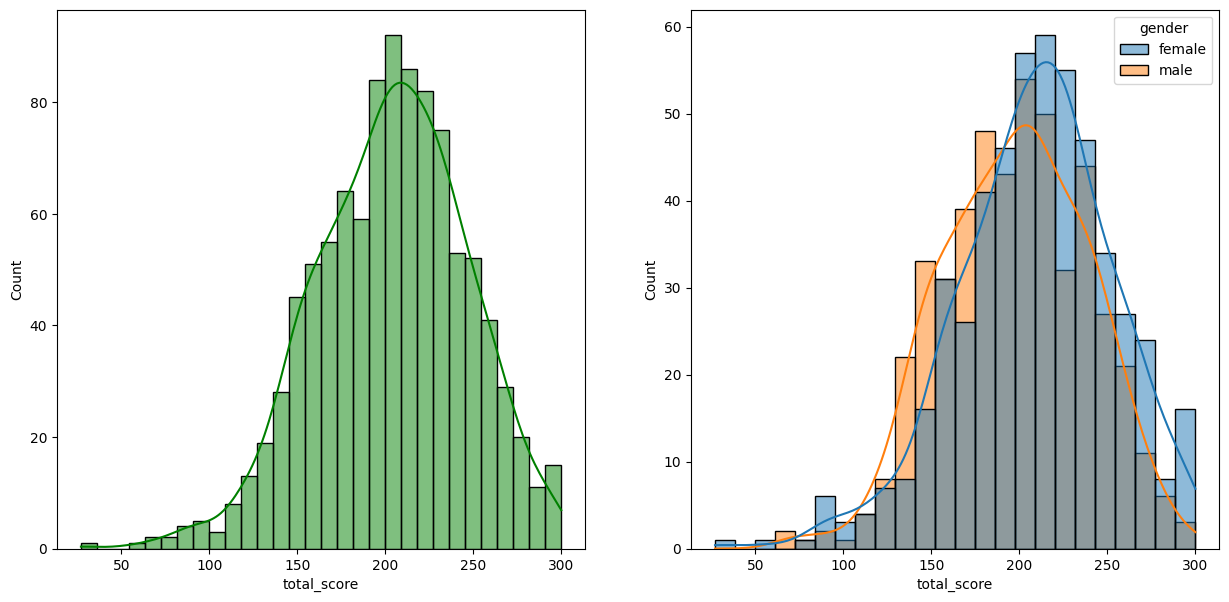

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))

sns.histplot(data=df, x="total_score", bins=30, kde=True, color='g', ax=axs[0])

sns.histplot(data=df, x="total_score", kde=True, hue='gender', ax=axs[1])

plt.show()